<a href="https://colab.research.google.com/github/luciekash/Regression-Analysis-with-Python-/blob/main/Regression_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

In [4]:
house = pd.read_csv('https://bit.ly/2Ww3f6sPropertiesDs')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# check dataset shape
house.shape

(21613, 21)

In [6]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

In [11]:
house = house.drop(columns = ['id', 'date'])

In [12]:
# dropping duplicates, if any
house.drop_duplicates(inplace = True)
house.shape

(21608, 19)

In [13]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21608.0,540098.369030,367164.571269,75000.0000,321837.500000,450000.0000,645000.000,7.700000e+06
bedrooms,21608.0,3.370927,0.930103,0.0000,3.000000,3.0000,4.000,3.300000e+01
bathrooms,21608.0,2.114738,0.770238,0.0000,1.750000,2.2500,2.500,8.000000e+00
sqft_living,21608.0,2079.958950,918.505805,290.0000,1429.250000,1910.0000,2550.000,1.354000e+04
sqft_lot,21608.0,15109.616300,41424.914310,520.0000,5040.000000,7620.0000,10690.500,1.651359e+06
floors,21608.0,1.494146,0.539910,1.0000,1.000000,1.5000,2.000,3.500000e+00
waterfront,21608.0,0.007544,0.086527,0.0000,0.000000,0.0000,0.000,1.000000e+00
view,21608.0,0.234219,0.766169,0.0000,0.000000,0.0000,0.000,4.000000e+00
condition,21608.0,3.409478,0.650782,1.0000,3.000000,3.0000,4.000,5.000000e+00
grade,21608.0,7.656655,1.175484,1.0000,7.000000,7.0000,8.000,1.300000e+01


In [14]:
# check for missing data
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [15]:
# create list to store column names to test against 'price'
house_columns = house.columns.to_list()
house_columns.remove('price')
len(house_columns)

18

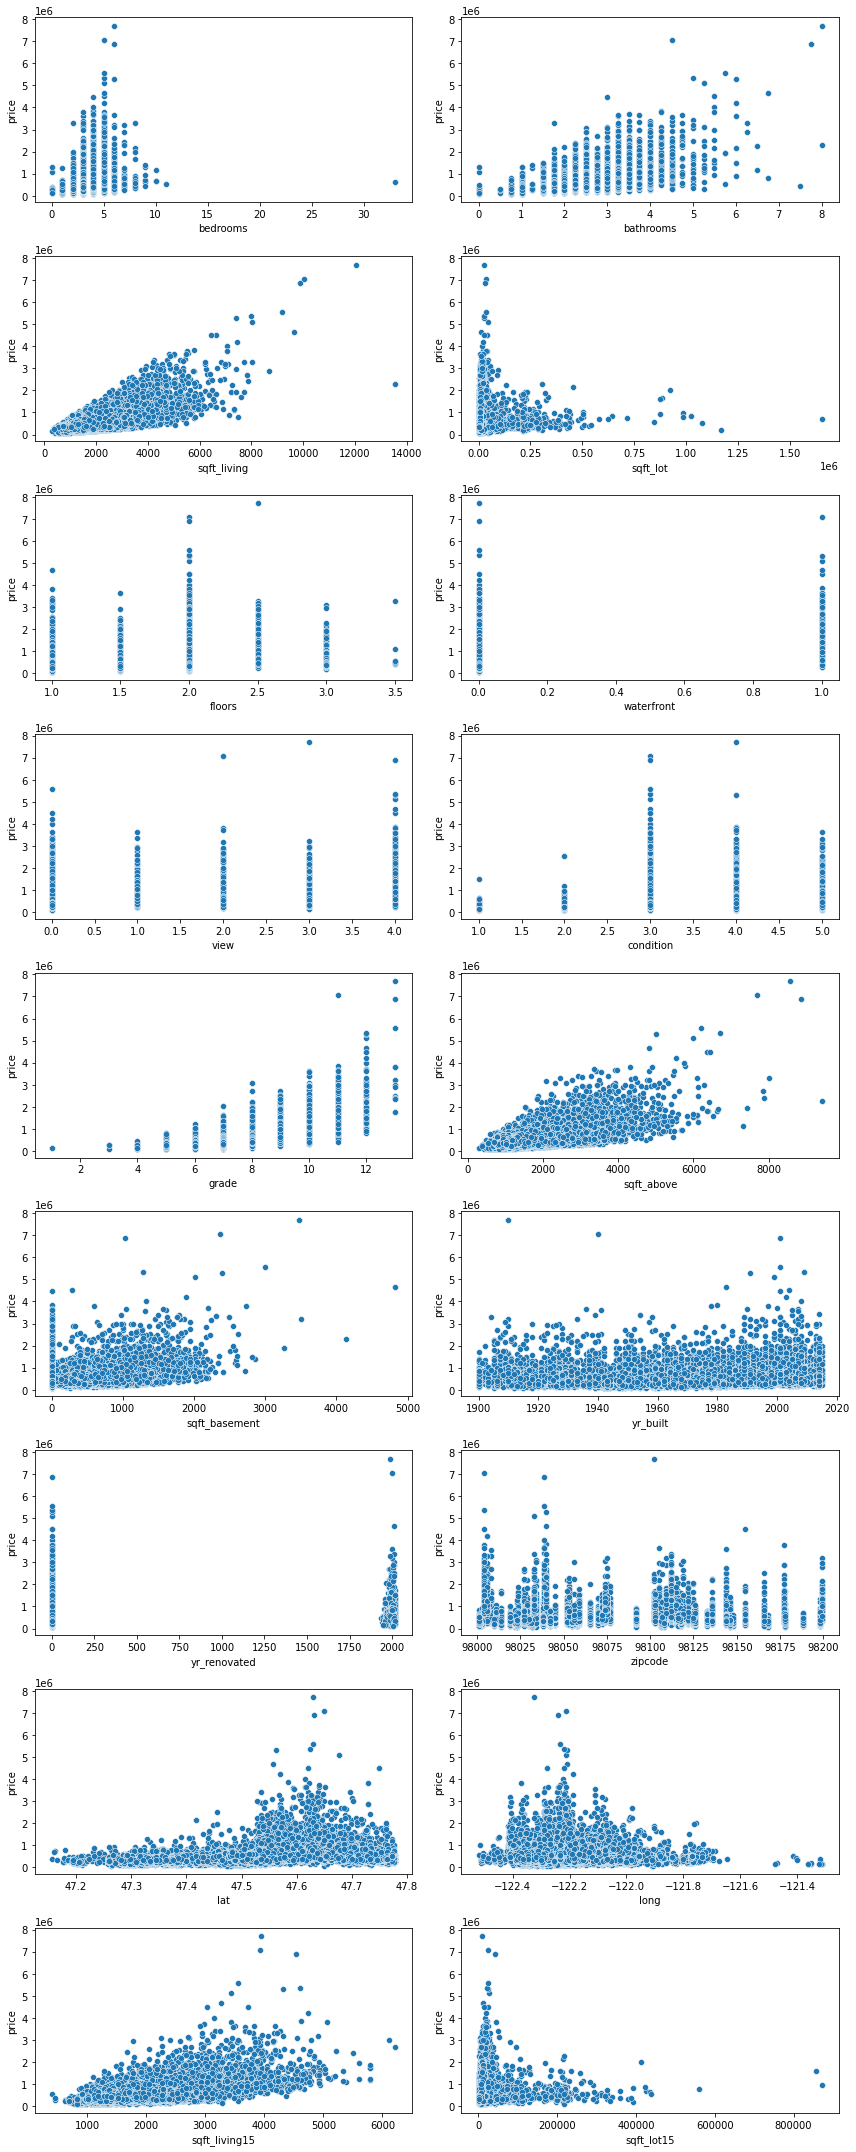

In [16]:
# creating scatterplots to observe the relationship between price and the variables
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), house_columns):
    sns.scatterplot(house[col], house['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.tight_layout()

What have you noticed? What will you do next?

### 3.2 Checking for outliers

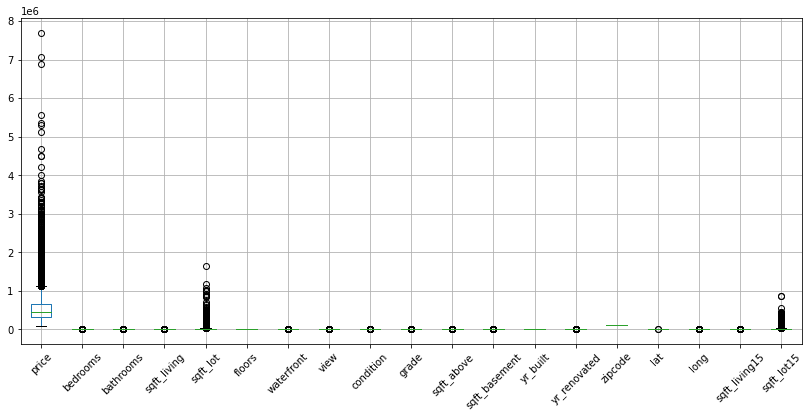

In [17]:
# create a boxplot to visualize the outliers
# looking for outliers
num_cols = house.columns.to_list()
# num_cols.remove('international_plan')
# num_cols.remove('churn')

plt.figure(figsize = (14, 6))
house.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.show()

What observations can you make? What actions are you going to take next?

### 3.3 Checking multicollinearity

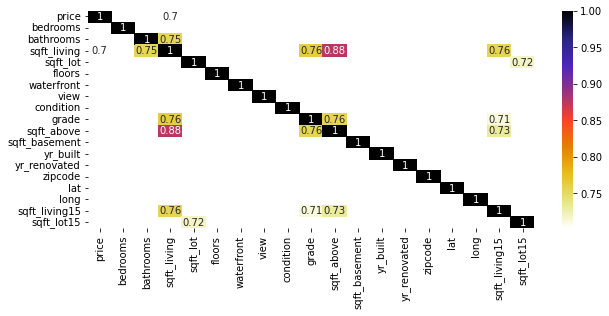

In [18]:
# create a heatmap of the correlations
import seaborn as sns

plt.figure(figsize = (10,4))
corr = house.corr()
corr = corr[corr > 0.70]
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r);

In [22]:
# check VIF scores
# check VIF scores
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


What have you noticed? What actions are you going to take next regarding this?

## <font color='#2F4F4F'>4. Data Modeling</font>

In [24]:
# split into features (X) and label (Y)
# split into features (X) and label (Y)
house_X = house.drop(['price'], axis =1)
house_y = house['price']

In [25]:
# split into 80-20 train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house_X, house_y, test_size=0.2, random_state=0)
print('\nX_train: ', X_train.shape, '\nX_test: ',X_test.shape, '\ny_train: ',y_train.shape, '\ny_test: ',y_test.shape)


X_train:  (17286, 18) 
X_test:  (4322, 18) 
y_train:  (17286,) 
y_test:  (4322,)


In [26]:
# fit regressor to data and make predictions
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# evaluate RMSE and r-squared scores

y_pred = regressor.predict(X_test)

In [28]:
house_y.mean()

540098.3690299889

In [29]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 194615.27495423617


In [30]:
print('R Squared:', metrics.r2_score(y_test, y_pred))

R Squared: 0.6882331365347032


What conclusions have you drawn?

### 4.1 Test for normality and homoscedasticity

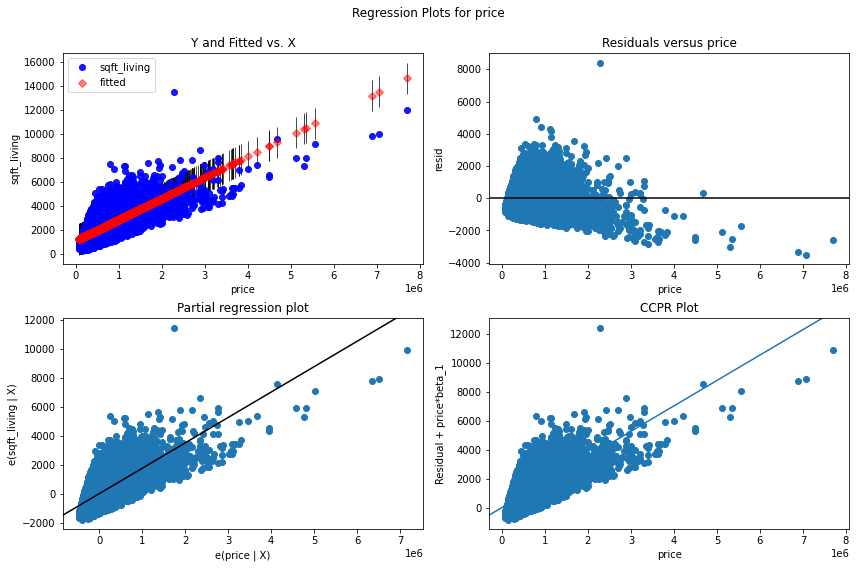

In [31]:
# create a dataframe of residuals
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm

#
model = ols('sqft_living ~ price', data=house).fit()
#
statsmodels.stats.stattools.durbin_watson(model.resid)
# create a dataframe of residuals
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)

# plotting our residuals
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'price', fig=fig)


What is your interpretation of the residual plot?


Min:  -1047431.8296447117 
Max:  4067145.7778666243 
Mean:  -3969.6191903365375


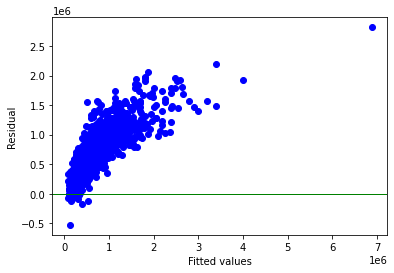

In [32]:
# create a dataframe of residuals
# YOUR CODE HERE
residuals = np.subtract(y_test,y_pred)
print('\nMin: ',residuals.min(), '\nMax: ',residuals.max(), '\nMean: ', residuals.mean())
# plotting our residuals


plt.scatter(y_test, y_pred, color='blue')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='green', linewidth=1)
plt.show()

In [33]:
import scipy as sp

import scipy.stats as stats
# using the scipy bartlett function to get our test result and p-value

#perform Bartlett's test 
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# computing the critical value of a chi-squared distribution
degree_of_freedom = len(y_pred) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)
print("test_result: ", test_result)

Critical value: inf
test_result:  819.6062264316735


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [34]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

The variances are homogeneous (equal).


### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [35]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, ada_predict)))
    print()
    
print("***************************************************") 

# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(X_train, y_train)
    gradient_predict = gradient.predict(X_test)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(X_train, y_train)
    xgbr_predict = xgbr.predict(X_test)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, xgbr_predict)))
    print()

Ada Boosting Regression with Learning Rate: 0.1
RMSE Score: 202440.9424180919

Ada Boosting Regression with Learning Rate: 0.2
RMSE Score: 222141.54239257495

Ada Boosting Regression with Learning Rate: 0.3
RMSE Score: 227746.7466572356

Ada Boosting Regression with Learning Rate: 0.4
RMSE Score: 237770.6405667392

Ada Boosting Regression with Learning Rate: 0.5
RMSE Score: 250629.88383088305

Ada Boosting Regression with Learning Rate: 0.6
RMSE Score: 266721.36738110107

Ada Boosting Regression with Learning Rate: 0.7
RMSE Score: 290128.0715574675

Ada Boosting Regression with Learning Rate: 0.8
RMSE Score: 289968.4479334681

Ada Boosting Regression with Learning Rate: 0.9
RMSE Score: 288069.97760697996

***************************************************
Gradient Boosting Regression with Learning Rate: 0.1
RMSE Score: 125192.43156254945

Gradient Boosting Regression with Learning Rate: 0.2
RMSE Score: 121117.05072812104

Gradient Boosting Regression with Learning Rate: 0.3
RMSE Score

In [36]:
print("Ada Boosting R-squared Score:", metrics.r2_score(y_test, ada_predict))
print("Gradient Boosting R-squared Score:", metrics.r2_score(y_test, gradient_predict))
print("XG Boosting R-squared Score:", metrics.r2_score(y_test, xgbr_predict))

Ada Boosting R-squared Score: 0.3169191609927319
Gradient Boosting R-squared Score: 0.8482131834922497
XG Boosting R-squared Score: 0.8486817105103923


From the above analysis, we see that XG Boosting with a learning rate of 0.1 returned the lowest RMSE score (125,974). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.